<a href="https://colab.research.google.com/github/Hemanthpusa/Deep-Learning/blob/main/Regression_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
data=pd.read_csv("auto-mpg.csv1.csv",
                 names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car names"])

In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car names
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
data.horsepower.mean()


102.89447236180905

In [ ]:
data['horsepower']=data['horsepower'].replace(0,data['horsepower'].mean())

In [ ]:
data.tail(50)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car names     398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
x=data.drop(['mpg','car names','origin','model year'],axis=1)
y=data["mpg"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=10)


In [ ]:
x_test

,cylinders,displacement,horsepower,weight,acceleration
331,4,97.0,67.0,2145,18.0
111,3,70.0,90.0,2124,13.5
350,4,105.0,63.0,2215,14.9
205,4,97.0,75.0,2155,16.4
56,4,91.0,70.0,1955,20.5
...,...,...,...,...,...
17,6,200.0,85.0,2587,16.0
225,6,250.0,110.0,3520,16.4
223,8,318.0,145.0,4140,13.7
59,4,97.0,54.0,2254,23.5


In [ ]:
tf.random.set_seed(42)

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(8),
                           tf.keras.layers.Dense(5),
                           tf.keras.layers.Dense(1)
 ])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(x_train, y_train ,epochs=100, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 5.5691 - mae: 5.5691


[5.569133281707764, 5.569133281707764]

Text(0.5, 0, 'epochs')

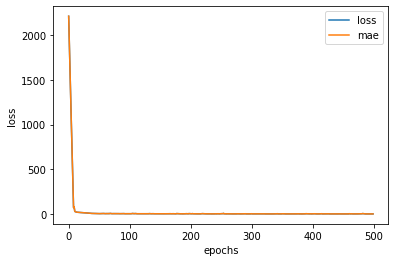

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")